In [474]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from json import load

In [526]:
results = load(open('bandbyband_dlam_results.json', 'r'))

In [527]:
len(results)

27

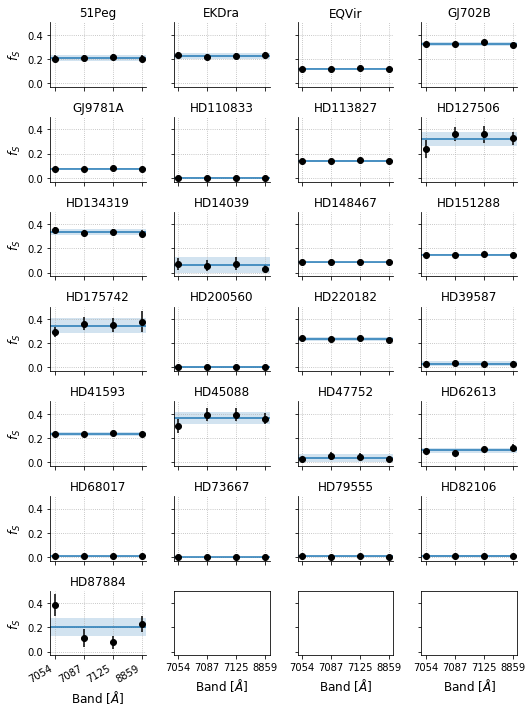

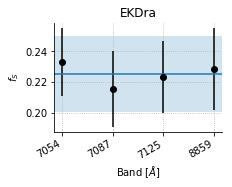

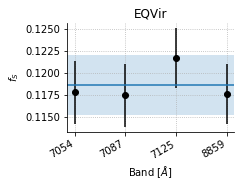

In [528]:
fig, ax = plt.subplots(7, 4, figsize=(7.5, 10), sharex=True, sharey=True)

table_results = []

f_S_all = []
f_S_err_all = []
f_S_stars = [] 

stars_big_plot = sorted(results.keys())
# stars_big_plot.remove('EKDra')
# stars_big_plot.remove('EQVir')

filtered_stars_big_plot = []
for s in stars_big_plot:
    if not s.startswith("EPIC"):
        filtered_stars_big_plot.append(s)

for star in ['EKDra', 'EQVir']:
    figure, axis = plt.subplots(figsize=(3, 2))
    for time in results[star]:
        f_S = np.mean([results[star][time][band]['f_S'] for band in results[star][time]])
        f_S_err = np.sqrt(np.sum(np.array([np.mean([results[star][time][band]['f_S_lower'], 
                                                    results[star][time][band]['f_S_upper']]) 
                                           for band in results[star][time]])**2)/4)
        f_S_all.append(f_S)
        f_S_err_all.append(f_S_err)
        f_S_stars.append(star)
        
#         table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})
        axis.axhline(f_S)
        axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.2)
        for i, band in enumerate(results[star][time]):
            m = results[star][time][band]

            axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
                          fmt='o', color='k')
            axis.set_title(star)

            for s in ['right', 'top']:
                axis.spines[s].set_visible(False)
            axis.grid(ls=':')
        axis.set_xticks(np.arange(4))
        axis.set_xticklabels(sorted(results[star][time].keys()))
        plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
    axis.set(xlabel='Band [$\AA$]', ylabel='$f_S$')
    figure.savefig('paper_plots/{}.pdf'.format(star), bbox_inches='tight')


# for star in [s for s in stars_big_plot if s.startswith("EPIC")]:
#     figure, axis = plt.subplots(figsize=(3, 2))
#     for time in results[star]:
#         f_S = np.mean([results[star][time][band]['f_S'] for band in results[star][time]])
#         f_S_err = np.sqrt(np.sum(np.array([np.mean([results[star][time][band]['f_S_lower'], 
#                                                     results[star][time][band]['f_S_upper']]) 
#                                            for band in results[star][time]])**2)/4)
#         f_S_all.append(f_S)
#         f_S_err_all.append(f_S_err)
#         f_S_stars.append(star)
        
# #         table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})
#         axis.axhline(f_S)
#         axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.2)
#         for i, band in enumerate(results[star][time]):
#             m = results[star][time][band]

#             axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
#                           fmt='o', color='k')
#             axis.set_title(star)

#             for s in ['right', 'top']:
#                 axis.spines[s].set_visible(False)
#             axis.grid(ls=':')
#         axis.set_xticks(np.arange(4))
#         axis.set_xticklabels(sorted(results[star][time].keys()))
#         plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
#     axis.set(xlabel='Band [$\AA$]', ylabel='$f_S$')
#     figure.savefig('paper_plots/{}.pdf'.format(star), bbox_inches='tight')

    
for j, star in enumerate(filtered_stars_big_plot): 
    axis = fig.axes[j]
    for time in results[star]:
        f_S = np.mean([results[star][time][band]['f_S'] for band in results[star][time]])
        f_S_err = np.sqrt(np.sum(np.array([np.mean([results[star][time][band]['f_S_lower'], 
                                                    results[star][time][band]['f_S_upper']]) 
                                           for band in results[star][time]])**2)/4)
        table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})

        f_S_all.append(f_S)
        f_S_err_all.append(f_S_err)
        f_S_stars.append(star)
        
        axis.axhline(f_S)
        axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.2)
        for i, band in enumerate(results[star][time]):
            m = results[star][time][band]
            
            axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
                          fmt='o', color='k')
            axis.set_title(star)
            
            for s in ['right', 'top']:
                axis.spines[s].set_visible(False)
            axis.grid(ls=':')
        axis.set_xticks(np.arange(4))
        axis.set_xticklabels(sorted(results[star][time].keys()))
        plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
        
for i in range(7):
    ax[i, 0].set_ylabel('$f_S$', fontsize=12)

for i in range(4):
    ax[-1, i].set_xlabel('Band [$\AA$]', fontsize=12)
    
fig.tight_layout()
fig.savefig('paper_plots/summary.pdf', bbox_inches='tight')

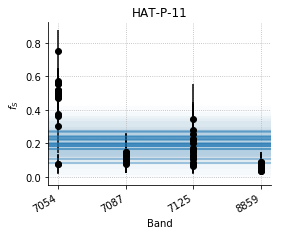

In [529]:
import json
h11_results = json.load(open('bandbyband_h11_results.json', 'r'))
figure, axis = plt.subplots(figsize=(4, 3))
for time in h11_results:
    f_S = np.mean([h11_results[time][band]['f_S'] for band in h11_results[time]])
    f_S_err = np.sqrt(np.sum(np.array([np.mean([h11_results[time][band]['f_S_lower'], 
                                                h11_results[time][band]['f_S_upper']]) 
                                       for band in h11_results[time]])**2)/4)
#     table_results.append({'Target': star, '$f_S$': "${0:.2f} \pm {1:.2f}$".format(f_S, f_S_err)})
    axis.axhline(f_S, alpha=0.5)
    axis.axhspan(f_S-f_S_err, f_S+f_S_err, alpha=0.02)
    for i, band in enumerate(h11_results[time]):
        m = h11_results[time][band]

        axis.errorbar(i, m['f_S'], yerr=np.array([[m['f_S_lower'], m['f_S_upper']]]), 
                      fmt='o', color='k')
        axis.set_title('HAT-P-11')

        for s in ['right', 'top']:
            axis.spines[s].set_visible(False)
        axis.grid(ls=':')
    axis.set_xticks(np.arange(4))
    axis.set_xticklabels(sorted(h11_results[time].keys()))
    plt.setp(axis.get_xticklabels(), rotation=30, ha='right')
axis.set(xlabel='Band', ylabel='$f_S$')
figure.savefig('paper_plots/h11.pdf', bbox_inches='tight')

In [530]:
from json import dump
from astropy.table import Table

f_S_table = Table(rows=table_results)

f_S_table.write('f_S.tex', overwrite=True)

In [531]:
machine_results = Table([f_S_stars, f_S_all, f_S_err_all], names=['Target', 'f_S', 'f_S_err'])
sinds_table = Table.read('/Users/bmmorris/git/arces_hk/freckles.tex')

In [532]:
sind_names = [s for s in sinds_table['Target']]
sinds = [float(s.split('\pm')[0][1:-1]) for s in sinds_table['$S$']]
sind_errs = [float(s.split('\pm')[1][1:-1]) for s in sinds_table['$S$']]


rprimes = [float(s.split('\pm')[0][1:-1]) for s in sinds_table['$\log R^\prime_\mathrm{HK}$']]
rprimes_errs = [float(s.split('\pm')[1][1:-1]) for s in sinds_table['$\log R^\prime_\mathrm{HK}$']]
# rprimes = [float(s) for s in sinds_table['$\log R^\prime_\mathrm{HK}$']]

In [533]:
sind_machine_table = Table([sind_names, sinds, sind_errs, rprimes, rprimes_errs], names=['Target', 'S', 'S_err', 'R', 'R_err'])

In [534]:
from astropy.table import join, Column
from astropy.io import ascii

gaia = ascii.read('temperatures/gaia2.tsv', data_start=3, delimiter='\t')
gaia.add_column(Column([s.replace(' ','') for s in gaia['_1']], 'Target'))

joined_table = join(join(sind_machine_table, machine_results), gaia, keys='Target')

In [535]:
#colors = (joined_table['BP-RP'] -  joined_table['BP-RP'].min())/ joined_table['BP-RP'].ptp()

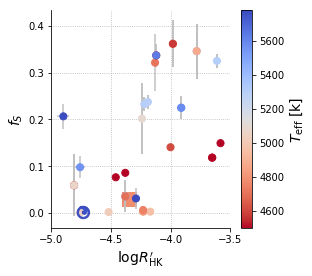

In [536]:
#xerr = 0.14

fig, ax = plt.subplots(figsize=(4, 4))
ax.errorbar(joined_table['R'], joined_table['f_S'], 
             xerr=joined_table['R_err'], yerr=joined_table['f_S_err'], fmt='.', ecolor='silver')

# cbar = ax.scatter(joined_table['R'], joined_table['f_S'], marker='o', 
#                   s=50, c=joined_table['BP-RP'], zorder=10, cmap=plt.cm.coolwarm, 
#                   vmin=0.8, vmax=1.5)
cbar = ax.scatter(joined_table['R'], joined_table['f_S'], marker='o', 
                  s=50, c=joined_table['Teff'], zorder=10, cmap=plt.cm.coolwarm_r, 
                  vmin=4500, vmax=5777)
cax = plt.colorbar(cbar, ax=ax)
#cax.set_clim(0.8, 2.0)
cax.set_label('$T_\mathrm{eff}$ [k]', fontsize=14)

hat11_color = cax.to_rgba(4780) #1.2787)
sun_color = cax.to_rgba(5777) #0.817)
ax.scatter(-4.74, 0.003, marker='$\odot$', s=200, color=sun_color, zorder=10)
ax.scatter(-4.35, 0.03, marker='s', s=200, color=hat11_color, zorder=-10)

ax.set(xlim=[-5.,-3.5])
ax.set_xlabel('$\log R^\prime_\mathrm{HK}$', fontsize=14)
ax.set_ylabel('$f_S$', fontsize=14)
for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
    
ax.grid(ls=':')
fig.savefig('paper_plots/fs_rprime.pdf', bbox_inches='tight')

In [537]:
# Problem children: HD222107, HD178126